In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df=pd.read_csv("chennai_weather_dataset.csv")

In [5]:
df.head()

,time,tavg,tmin,tmax,prcp
0,01-01-1990,25.2,22.8,28.4,0.5
1,02-01-1990,24.9,21.7,29.1,0.0
2,03-01-1990,25.6,21.4,29.8,0.0
3,04-01-1990,25.7,NaN,28.7,0.0
4,05-01-1990,25.5,20.7,28.4,0.0


In [6]:
df.shape

(11894, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11894 entries, 0 to 11893
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    11894 non-null  object 
 1   tavg    11867 non-null  float64
 2   tmin    8810 non-null   float64
 3   tmax    10875 non-null  float64
 4   prcp    7008 non-null   float64
dtypes: float64(4), object(1)
memory usage: 464.7+ KB


In [8]:
df.describe()

,tavg,tmin,tmax,prcp
count,11867.000000,8810.000000,10875.000000,7008.000000
mean,28.490798,24.382770,33.908285,6.244378
std,2.605824,2.592423,3.380630,19.039751
min,20.900000,12.000000,23.800000,0.000000
25%,26.300000,22.600000,31.100000,0.000000
50%,28.700000,24.600000,34.000000,0.000000
75%,30.400000,26.400000,36.200000,3.000000
max,36.600000,31.000000,44.600000,344.900000


**Data Cleaning**

In [9]:
df.isnull().sum()

time       0
tavg      27
tmin    3084
tmax    1019
prcp    4886
dtype: int64

In [10]:
df=df.fillna({'tavg': df['tavg'].mean(),'tmin':df['tmin'].mean(),'tmax':df['tmax'].mean(),'prcp':df['prcp'].mean()})

In [11]:
df.isnull().sum()

time    0
tavg    0
tmin    0
tmax    0
prcp    0
dtype: int64

In [12]:
df['time'].dtype

dtype('O')

In [19]:
df['time']=pd.to_datetime(df['time'],format='%d-%m-%Y')

In [20]:
df['time'].head()

0   1990-01-01
1   1990-01-02
2   1990-01-03
3   1990-01-04
4   1990-01-05
Name: time, dtype: datetime64[ns]

In [21]:
df[df.duplicated('time')]

,time,tavg,tmin,tmax,prcp


In [22]:
df['day']=df['time'].apply(lambda x:x.day)
df['month']=df['time'].apply(lambda x:x.month)
df['year']=df['time'].apply(lambda x:x.year)

In [23]:
df.head()

,time,tavg,tmin,tmax,prcp,day,month,year
0,1990-01-01,25.2,22.80000,28.4,0.5,1,1,1990
1,1990-01-02,24.9,21.70000,29.1,0.0,2,1,1990
2,1990-01-03,25.6,21.40000,29.8,0.0,3,1,1990
3,1990-01-04,25.7,24.38277,28.7,0.0,4,1,1990
4,1990-01-05,25.5,20.70000,28.4,0.0,5,1,1990


**Data Visualization**

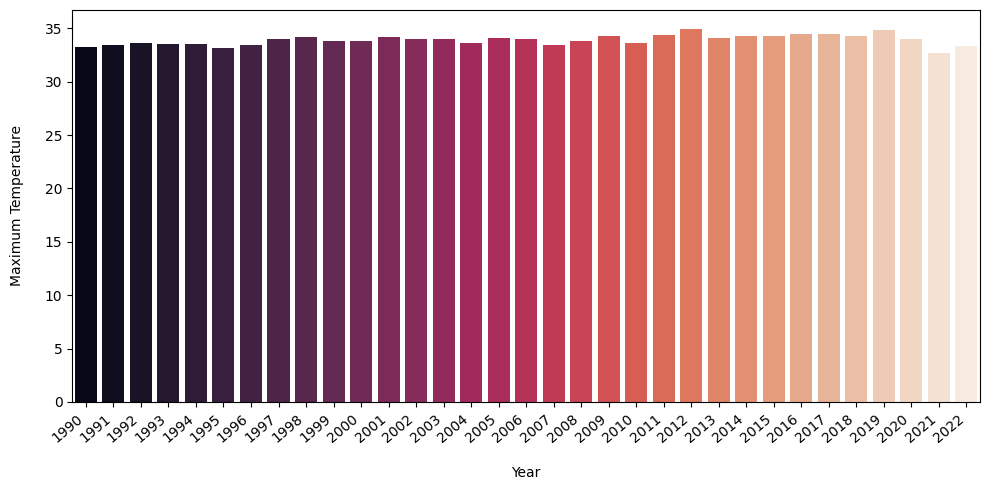

In [24]:
plt.figure(figsize=(10, 5))
plt.ylabel("Maximum Temperature",labelpad=15)
plt.xlabel('Year',labelpad=15)
ax=sns.barplot(x='year',y='tmax',hue="year",data=df,palette="rocket",errorbar=None,legend=False)
ticks=ax.get_xticks()
ax.set_xticks(ticks)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

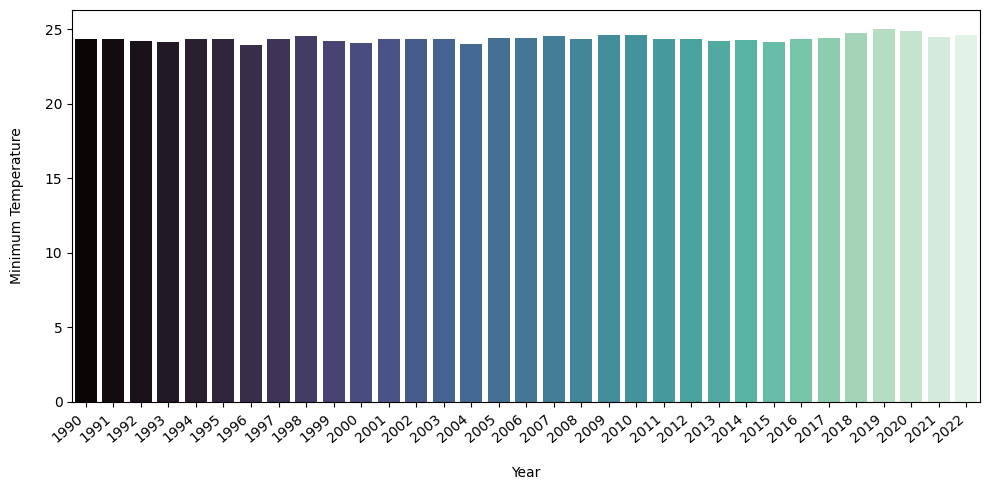

In [25]:
plt.figure(figsize=(10, 5))
plt.ylabel("Minimum Temperature",labelpad=15)
plt.xlabel('Year',labelpad=15)
ax=sns.barplot(x='year',y='tmin',hue="year",data=df,palette="mako",errorbar=None,legend=False)
ticks=ax.get_xticks()
ax.set_xticks(ticks)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

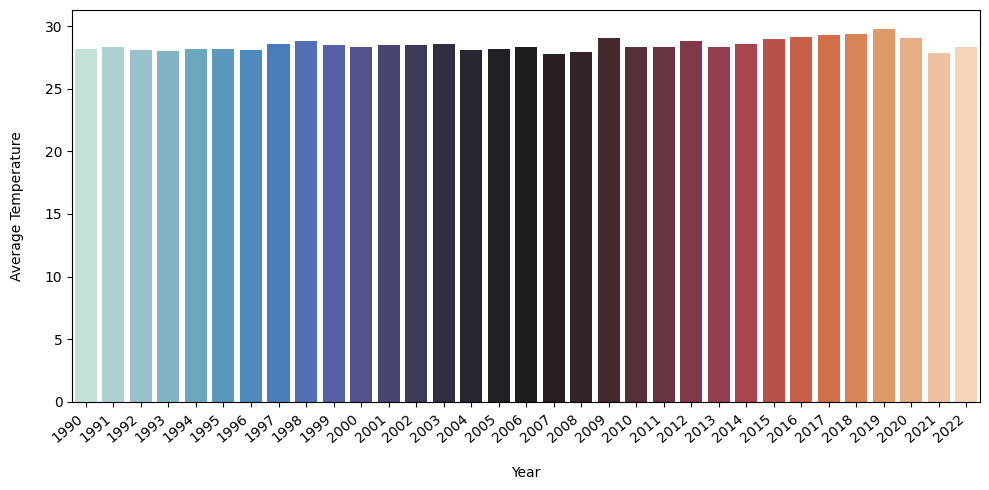

In [26]:
plt.figure(figsize=(10, 5))
plt.ylabel("Average Temperature",labelpad=15)
plt.xlabel('Year',labelpad=15)
ax=sns.barplot(x='year',y='tavg',hue="year",data=df,palette="icefire",errorbar=None,legend=False)
ticks=ax.get_xticks()
ax.set_xticks(ticks)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

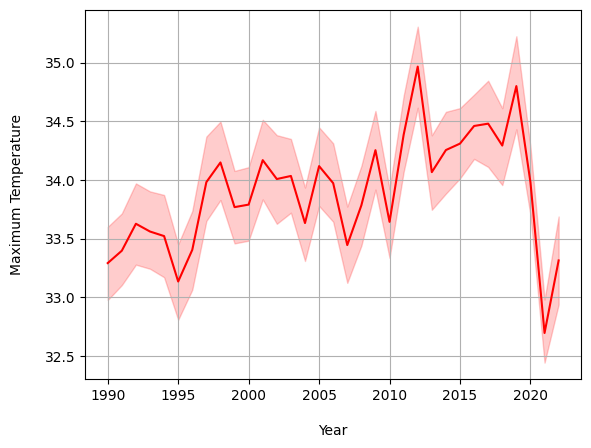

In [27]:
plt.ylabel("Maximum Temperature",labelpad=15)
plt.xlabel('Year',labelpad=15)
sns.lineplot(data=df,x='year',y='tmax',color='red')
plt.grid()

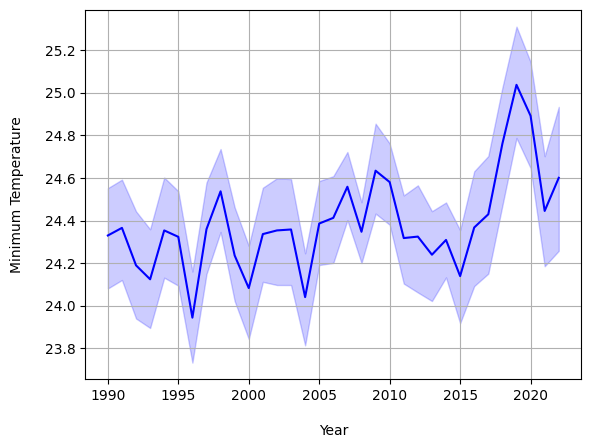

In [28]:
plt.ylabel("Minimum Temperature",labelpad=15)
plt.xlabel('Year',labelpad=15)
sns.lineplot(data=df,x='year',y='tmin',color='blue')
plt.grid()

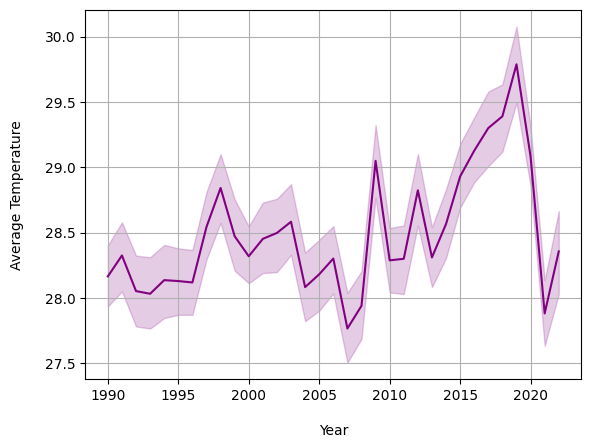

In [29]:
plt.ylabel("Average Temperature",labelpad=15)
plt.xlabel('Year',labelpad=15)
sns.lineplot(data=df,x='year',y='tavg',color='purple')
plt.grid()

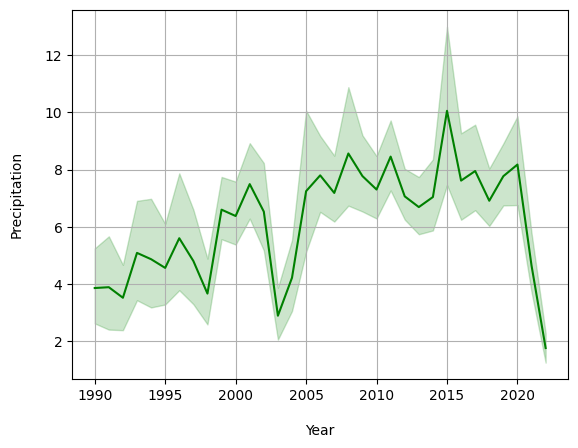

In [30]:
plt.ylabel("Precipitation",labelpad=15)
plt.xlabel('Year',labelpad=15)
sns.lineplot(data=df,x='year',y='prcp',color='green')
plt.grid()

In [31]:
df['year'].unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
      dtype=int64)

**November 2002 Floods Representation**

The precipitation plot for November 2002 shows significant spikes in rainfall, particularly during key flood days. The average temperature plot reveals a cooling trend on heavy rainfall days, highlighting the relationship between intense rain and flood conditions in Chennai.

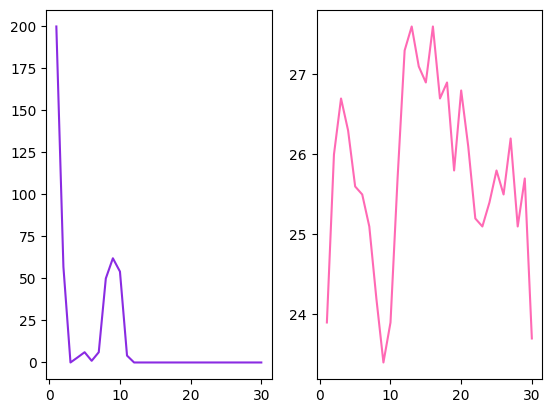

In [32]:
nov_dates=df[(df['time']>='2002-11-01') & (df['time']<='2002-11-30')]
fig,axes=plt.subplots(1,2)
axes[0].plot(nov_dates['day'],nov_dates['prcp'],color="blueviolet")
axes[1].plot(nov_dates['day'],nov_dates['tavg'],color="hotpink")

**Cyclone Nisha (2008)**

The heatmap for November 2008 reveals significant rainfall intensity, particularly around November 30, correlating with Cyclone Nisha's impact on Chennai. This visualization underscores the concentrated precipitation during the cyclone, highlighting potential flooding risks on those days.

Text(50.722222222222214, 0.5, 'Day')

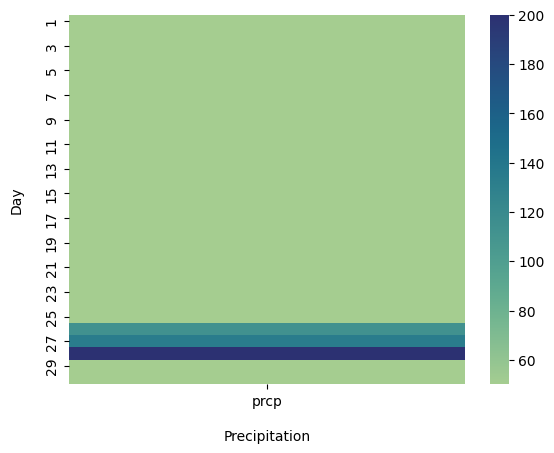

In [95]:
nov_dates=df[(df['time']>='2008-11-01') & (df['time']<='2008-11-30')]
pivot_data=nov_dates.pivot_table(values='prcp',index='day')
sns.heatmap(data=pivot_data,vmin=50,vmax=200,cmap='crest')
plt.xlabel("Precipitation",labelpad=15)
plt.ylabel("Day",labelpad=15)

**Cyclone Jal (2010)**

The bar plot for November 2010 shows significant spikes in precipitation on specific days, particularly around November 25-27, correlating with Cyclone Jal's impact on Chennai. This highlights the intense rainfall experienced during the cyclone, which contributed to flooding and other weather-related issues.

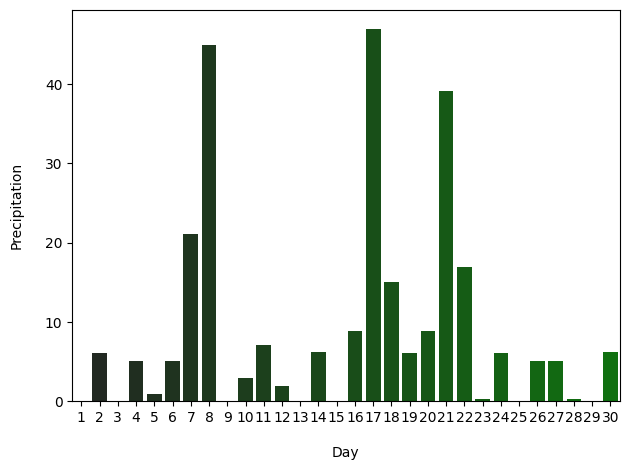

In [94]:
nov_dates=df[(df['time']>='2010-11-01') & (df['time']<='2010-11-30')]
sns.barplot(data=nov_dates,x="day",y="prcp",hue="day",palette="dark:green",legend=False)
plt.ylabel("Precipitation",labelpad=15)
plt.xlabel("Day",labelpad=15)
plt.tight_layout()

**Cyclone Vardah (2016)**

The scatter plot for December 2016 reveals significant spikes in precipitation on specific days, particularly around December 12-13, correlating with Cyclone Vardah's impact on Chennai. This highlights how extreme rainfall levels contributed to the flooding experienced during that period.

Text(0, 0.5, 'Day')

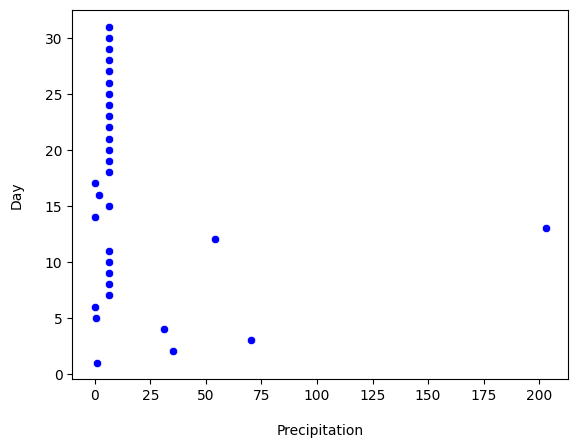

In [93]:
dec_dates=df[(df['time']>='2016-12-01') & (df['time']<='2016-12-31')]
sns.scatterplot(data=dec_dates,x="prcp",y="day",color="blue")
plt.xlabel("Precipitation",labelpad=15)
plt.ylabel("Day",labelpad=15)

**2021 November Flooding**

In November 2021, the spikes in precipitation observed in the bar plots likely contributed to the severe flooding in Chennai, with heavy rainfall leading to significantly lower minimum and average temperatures. This correlation highlights the impact of extreme weather events on local climate conditions, emphasizing the role of intense rainfall in exacerbating flooding situations.

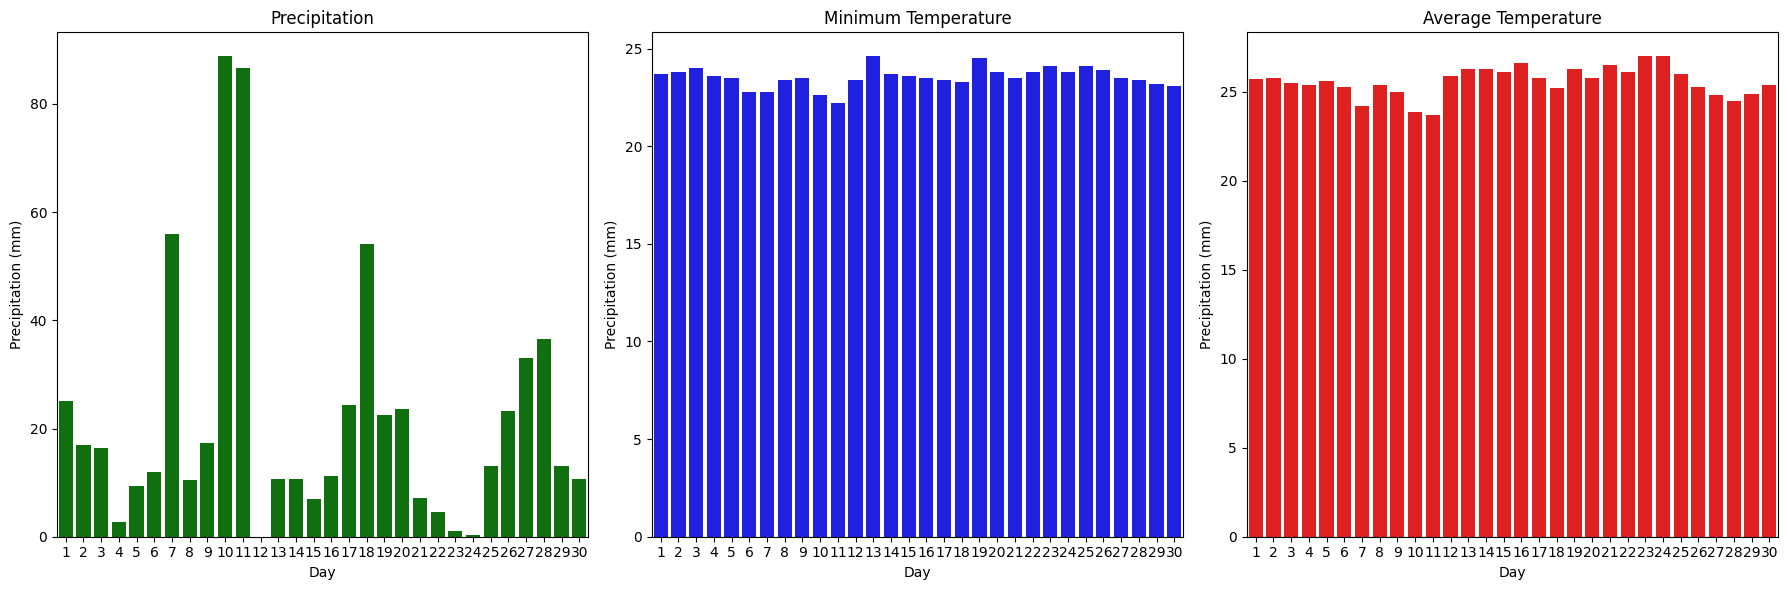

In [90]:
nov_dates=df[(df['time']>='2021-11-01') & (df['time']<='2021-11-30')]
fig, axes = plt.subplots(1, 3, figsize=(18, 6)) 

# First Bar Plot
sns.barplot(data=nov_dates, x='day', y='prcp', ax=axes[0], color='green')
axes[0].set_title('Precipitation')
axes[0].set_xlabel('Day')
axes[0].set_ylabel('Precipitation (mm)')

# Second Bar Plot
sns.barplot(data=nov_dates, x='day', y='tmin', ax=axes[1], color='blue')
axes[1].set_title('Minimum Temperature')
axes[1].set_xlabel('Day')
axes[1].set_ylabel('Precipitation (mm)')

# Third Bar Plot
sns.barplot(data=nov_dates, x='day', y='tavg', ax=axes[2], color='red')
axes[2].set_title('Average Temperature')
axes[2].set_xlabel('Day')
axes[2].set_ylabel('Precipitation (mm)')
plt.tight_layout()  
plt.show()